In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Pre-processing the dataset

In [2]:
df_train=pd.read_csv('./BBC_News_Train.csv')
df_train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
df_train=df_train.dropna()
x_train=df_train.drop(['ArticleId','Category'],axis=1)
x_train

,Text
0,worldcom ex-boss launches defence lawyers defe...
1,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...
3,lifestyle governs mobile choice faster bett...
4,enron bosses in $168m payout eighteen former e...
...,...
1485,double eviction from big brother model caprice...
1486,dj double act revamp chart show dj duo jk and ...
1487,weak dollar hits reuters revenues at media gro...
1488,apple ipod family expands market apple has exp...


In [4]:
y=df_train['Category']
y

0            business
1            business
2            business
3                tech
4            business
            ...      
1485    entertainment
1486    entertainment
1487         business
1488             tech
1489             tech
Name: Category, Length: 1490, dtype: object

In [5]:
articles_train=x_train.copy()
articles_train.reset_index(inplace=True)
articles_train

,index,Text
0,0,worldcom ex-boss launches defence lawyers defe...
1,1,german business confidence slides german busin...
2,2,bbc poll indicates economic gloom citizens in ...
3,3,lifestyle governs mobile choice faster bett...
4,4,enron bosses in $168m payout eighteen former e...
...,...,...
1485,1485,double eviction from big brother model caprice...
1486,1486,dj double act revamp chart show dj duo jk and ...
1487,1487,weak dollar hits reuters revenues at media gro...
1488,1488,apple ipod family expands market apple has exp...


In [6]:
from nltk.stem import WordNetLemmatizer

def text_preprocess(articles: pd.DataFrame) -> list:
    lemmatizer = WordNetLemmatizer()
    corpus=[]
    for i in range(0,len(articles)):
    #     print(i)
        review = re.sub('[^a-zA-Z]', ' ', articles['Text'][i]) #replacing all charecters apart from A-Z,a-z with ' '
        review = review.lower()
        review = nltk.word_tokenize(review)

        review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [7]:
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
# corpus=[]
# for i in range(0,len(articles_train)):
# #     print(i)
#     review = re.sub('[^a-zA-Z]', ' ', articles_train['Text'][i]) #replacing all charecters apart from A-Z,a-z with ' '
#     review = review.lower()
#     review = nltk.word_tokenize(review)
    
#     review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
#     review = ' '.join(review)
#     corpus.append(review)
# corpus
corpus_train = text_preprocess(articles_train)
corpus_train

['worldcom ex bos launch defence lawyer defending former worldcom chief bernie ebbers battery fraud charge called company whistleblower first witness cynthia cooper worldcom ex head internal accounting alerted director irregular accounting practice u telecom giant warning led collapse firm following discovery bn bn accounting fraud mr ebbers pleaded guilty charge fraud conspiracy prosecution lawyer argued mr ebbers orchestrated series accounting trick worldcom ordering employee hide expense inflate revenue meet wall street earnings estimate m cooper run consulting business told jury new york wednesday external auditor arthur andersen approved worldcom accounting early said andersen given green light procedure practice used worldcom mr ebber lawyer said unaware fraud arguing auditor alert problem m cooper also said shareholder meeting mr ebbers often passed technical question company finance chief giving brief answer prosecution star witness former worldcom financial chief scott sulliva

# Plotting graph and vectorzing

In [8]:
from gowpy.gow.builder import GoWBuilder
builder = GoWBuilder(directed=True, window_size=4)
gow = builder.compute_gow_from_document(corpus_train[0])

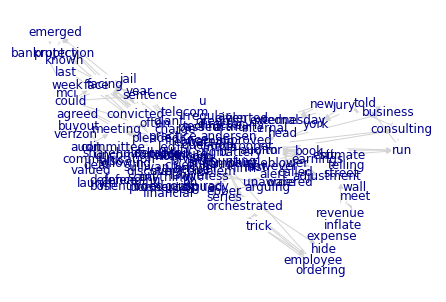

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

g = gow.to_labeled_graph()

options = {
    "font_weight" : 'normal',
    "font_color" : 'darkblue',
    #
    "edge_color" : 'lightgray',
    #
    "node_size" : 400,
    "node_color": 'white',
    "with_labels": True,
}
nx.draw(g, **options)

In [10]:
from gowpy.summarization.unsupervised import CoreRankKeywordExtractor

extractor_kw_cr = CoreRankKeywordExtractor(directed=False, weighted=True, window_size=2)
extractor_kw_cr.extract(corpus_train[0], n=20)

[('worldcom', 32),
 ('accounting', 26),
 ('said', 22),
 ('mr', 20),
 ('ebbers', 19),
 ('fraud', 17),
 ('cooper', 14),
 ('lawyer', 13),
 ('chief', 12),
 ('sullivan', 12),
 ('charge', 10),
 ('m', 9),
 ('andersen', 9),
 ('meeting', 9),
 ('company', 8),
 ('witness', 8),
 ('practice', 8),
 ('firm', 8),
 ('prosecution', 8),
 ('auditor', 8)]

In [11]:
from gowpy.feature_extraction.gow import TwidfVectorizer

vectorizer_gow = TwidfVectorizer(directed=True,window_size=4,min_df=0.0,max_df=1.0,term_weighting='degree')

X = vectorizer_gow.fit_transform(corpus_train).toarray()
X.shape

(1490, 20849)

# Pre-processing and vectorizing testing dataset (doesn't work)

In [15]:
# df_test=pd.read_csv('./BBC News Test.csv')
# df_test=df_test.dropna()

# x_test=df_test.drop(['ArticleId'],axis=1)

# df_test_y=pd.read_csv('./BBC News Sample Solution.csv')
# y_test=df_test_y['Category']

# articles_test=x_test.copy()
# articles_test.reset_index(inplace=True)

# corpus_test = text_preprocess(articles_test)
# corpus_test

In [52]:
# X_test = vectorizer_gow.fit_transform(corpus_test).toarray()
# X_test.shape

(735, 15574)

# Splitting into training and testing datasets

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Training the classifier and prediction

In [14]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
classification_report = classification_report(y_test, y_pred)

print('\n Accuracy: ', accuracy_score(y_test, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)


 Accuracy:  0.9686800894854586

Classification Report

                precision    recall  f1-score   support

     business       0.98      0.98      0.98       103
entertainment       1.00      0.96      0.98        89
     politics       0.97      0.94      0.96        81
        sport       0.93      1.00      0.97        97
         tech       0.96      0.96      0.96        77

     accuracy                           0.97       447
    macro avg       0.97      0.97      0.97       447
 weighted avg       0.97      0.97      0.97       447

